In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Datos

El set de datos contiene la relacion entre el eje z solidario al solenoide y el campo magnético en ese eje.

La posición en z fue medida con una regla, por tal motivo los errors de z fueron estimados de manera conservadora como $0.5$ para cada punto medido.

Para medir el campo magnético se fijaba la sonda en un valor de $z$, y se midieron los valores de campo $B_0$ y $B_{180}$, para luego informar $Bz = \frac{B_0-B_{180}}{2}$. En cada caso, para obtener el valor de campo se muestreaba durante 5 segundos y luego se promediaba. El error informado para cada punto de campo es la desviacion estandar de ese promedio.

In [25]:
df = pd.read_csv( "datos/campo_mag_bobina.csv" )

df.head()

,z [cm],err_z,Bz [T],err_Bz
0,0.0,0.5,0.000007,1.762362e-08
1,1.0,0.5,0.000008,2.245624e-08
2,2.0,0.5,0.000009,3.916987e-07
3,3.0,0.5,0.000010,1.018435e-09
4,4.0,0.5,0.000010,5.510986e-08


<Axes: xlabel='z [cm]'>

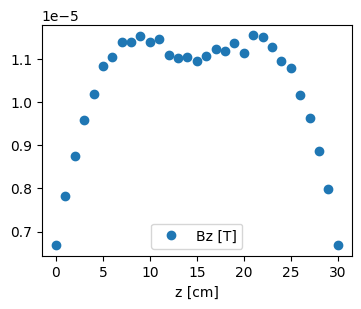

In [26]:
df.plot( x="z [cm]", y='Bz [T]' ,marker='o', figsize=(4,3), linewidth=0)

### Ajuste - Campo magnético en un solenoide real

Si el solenoide no es infinitamente largo o si se considera una posición cercana a los extremos, el campo magnético ya no es completamente uniforme. En este caso, el campo en el eje del solenoide (eje \( z \)) puede aproximarse mediante:

$$
B(z) = \frac{\mu_0 n I}{2} \left( \frac{L/2 + z}{\sqrt{R^2 + (L/2 + z)^2}} + \frac{L/2 - z}{\sqrt{R^2 + (L/2 - z)^2}} \right)
$$

donde:
- $L$ = longitud del solenoide
- $R$ = radio del solenoide
- $z$ = distancia desde el centro del solenoide a lo largo de su eje


planteamos el modelo:

In [ ]:
def modelo_Bz(z,u, L,n, mu0,I,R):

    A1 = (( L/2) + z)/np.sqrt( ( (L/2) + z)**2 + R**2 )
    A2 = (( L/2) - z)/np.sqrt( ( (L/2) - z)**2 + R**2 )

    return (mu0*I*n/2.0)*(  A1+A2 )

ajusto:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Parámetros obtenidos del ajuste:
L = (30.9537 ± 0.276502)
R = (2.0766 ± 85454971053394.062500)
n = (27.6562 ± 37818894.823351)
$\mu_0$ = (0.2046 ± 8417997609508.162109)
I = (3.8380 ± 0.378300)


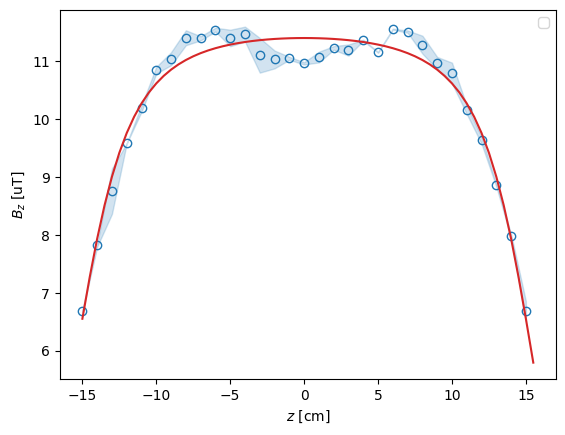

In [ ]:
z = df["z [cm]"].to_numpy()-15              # translado el cero
err_z= df["err_z"].to_numpy()          

Bz = df["Bz [T]"].to_numpy()*1e6            # campo en militesla
err_Bz = df["err_Bz"].to_numpy()*1e6


# parametros 
L_ini=30
R_ini=5 
mu0_ini=1.257 # en 1e-6
n_ini=170
I_ini=0.057

nom= ["L", "R","n", "$\mu_0$", "I"]

po = [L_ini, R_ini, n_ini, mu0_ini, I_ini]


# ajuste
popt, pcov = curve_fit(modelo_Bz, z, Bz, p0=po )      
SE = np.sqrt(np.diag(pcov)) # Errores 


# Resutados 
print ("Parámetros obtenidos del ajuste:")
for i in range(len(nom)):
    print(f"{nom[i]} = ({popt[i]:.4f} ± {SE[i]:.6f})")

z_ = np.arange(-15, 16, 0.5)
Bz_ = modelo_Bz(z_, *popt )



#plots
fig, ax = plt.subplots()

# data
ax.scatter( z, Bz, marker='o', facecolor='white', edgecolor="C0")
ax.fill_between(z, Bz-err_Bz, Bz+err_Bz, color = "C0",alpha=0.2)

# model
ax.plot( z_, Bz_, c='C3')

ax.set_xlabel("$z$ [cm]")
ax.set_ylabel("$B_z$ [uT]")
ax.legend()
plt.show()

In [ ]:






L=0.15
R=0.05 

n=200
mu0=1.257e-6
I=0.050

z0=0.079

z = np.arange(-0.15, 0.16, 0.01)

Bz_ = campo_Bz(z, z0, L, n, mu0,I,R) +campo_Bz(z, -z0, L, n, mu0,I,R) 

Bz = Bz_ + np.random.random(size=len(Bz_))*3e-7

fig, ax = plt.subplots()

ax.scatter(z, Bz)

ax.axvline(0)

plt.show()



In [132]:
data= {"z":100*(z+0.15), "B":Bz}

pd.DataFrame(data=data).to_csv( "campo_mag_bobina.csv",index=False )


